In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os
from funzioni import compute_dataset_weighted
from funzioni import compute_annual_mean_weighted
from funzioni import convert_dataset_celsius
from funzioni import compute_anomaly
from funzioni import create_djf_dataset
from funzioni import compute_mean_time_season
from funzioni import compute_mean_resample_mar
from funzioni import plot_bias_atmos
from funzioni import plot_bias_tos
from funzioni import plot_mean_cluster_atmos
from funzioni import plot_mean_cluster_tos
from funzioni import plot_bias_2_models_atmos
from funzioni import plot_bias_2_models_tos
from funzioni import plot_std_cluster_atmos
from funzioni import plot_zonmean
from funzioni import plot_zonmean_2_cluster
from funzioni import plot_mean_cluster_zonmean
from funzioni import plot_std_cluster_tos
from funzioni import plot_std_cluster_zonmean
from funzioni import bs_sample_mean
from funzioni import bs_compute_array_mean_std_95cl
from funzioni import plot_bs_95cl_mean_std
from funzioni import bs_compute_matrix10
from funzioni import plot_bs_mean_cluster_matrix10
from funzioni import compute_theta
from funzioni import compute_theta_era
from funzioni import compute_derivative
from funzioni import compute_frequency
from funzioni import compute_coriolis_parameter
from funzioni import compute_egr
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import plotly.express as px
import dill
import pickle
import cartopy.crs as ccrs
import random
import math

Caricamento dei file pickle

In [3]:
# Caricamento di models_atmos e models_zonmean
with open('models_atmos.pkl','rb') as file:
    models_atmos = dill.load(file)
    era_na_seas_mean = dill.load(file)
#with open('models_zonmean.pkl','rb') as file:
#    models_zonmean = dill.load(file)
#    era_seas_mean = dill.load(file)
with open('modelli_atmos.pickle', 'rb') as f:
    # Caricamento delle 5 liste contenenti i nomi dei modelli all'interno dei 5 cluster
    list_cluster0 = pickle.load(f)
    list_cluster1 = pickle.load(f)
    list_cluster2 = pickle.load(f)
    list_cluster3 = pickle.load(f)
    list_cluster4 = pickle.load(f)
    
    # Caricamento dei 5 cluster in formato pdf
    atmos_cluster0 = pickle.load(f)
    atmos_cluster1 = pickle.load(f)
    atmos_cluster2 = pickle.load(f)
    atmos_cluster3 = pickle.load(f)
    atmos_cluster4 = pickle.load(f)
    
    # Caricamento dei cluster medi in formato pdf
    atmos_cluster0_mean = pickle.load(f)
    atmos_cluster1_mean = pickle.load(f)
    atmos_cluster2_mean = pickle.load(f)
    atmos_cluster3_mean = pickle.load(f)
    atmos_cluster4_mean = pickle.load(f)

    #Caricamento dei cluster standard deviation in formato pdf
    atmos_cluster0_std = pickle.load(f)
    atmos_cluster1_std = pickle.load(f)
    atmos_cluster2_std = pickle.load(f)
    atmos_cluster3_std = pickle.load(f)
    atmos_cluster4_std = pickle.load(f)

In [4]:
# Caricamento di models_atmos e models_zonmean
with open('models_ua.pkl','rb') as file:
    models_ua = dill.load(file)
    era_ua_seas_mean= dill.load(file)
with open('models_ta.pkl','rb') as file:
    models_ta = dill.load(file)
    era_ta_seas_mean = dill.load(file)
    dict_egr_era = dill.load(file) #dizionario di ERA5_ta per il calcolo di egr

In [55]:
models_ta['ACCESS-CM2']['Eady Growth Rate']

array([[[2.90497181e-09, 1.39927941e-09, 4.40274934e-10, ...,
                    nan,            nan,            nan],
        [2.12847145e-08, 1.97268617e-08, 1.74136455e-08, ...,
                    nan,            nan,            nan],
        [4.93466963e-08, 4.90157316e-08, 4.79928947e-08, ...,
                    nan,            nan,            nan],
        ...,
        [1.36841054e-07, 1.39090954e-07, 1.36865896e-07, ...,
         1.05385799e-06, 1.04208213e-06, 1.02333863e-06],
        [2.31606583e-07, 2.35432557e-07, 2.40322702e-07, ...,
         7.12191832e-07, 7.10286304e-07, 7.06184351e-07],
        [3.53552354e-07, 3.57866150e-07, 3.63472686e-07, ...,
         5.16879878e-07, 5.19602831e-07, 5.21593945e-07]],

       [[9.65269613e-09, 7.42586221e-09, 5.03766754e-09, ...,
         4.38438442e-08, 4.34515560e-08,            nan],
        [1.67952697e-08, 2.33423581e-08, 3.00155520e-08, ...,
         1.50944404e-07, 1.38288164e-07, 1.38965725e-07],
        [5.74935113e-08, 

Salvo models_ta[name]['Eady Growth Rate] in formato xarray

In [5]:
for name in models_ta.keys():
    # Creo un xarray vuoto con la stessa forma di models_ta[name]['ta seasonal mean DJF'][1:-1,:,:]
    models_ta[name]['xr Eady Growth Rate'] = xr.DataArray(np.empty(models_ta[name]['ta seasonal mean DJF'][1:-1,:,:].shape), dims=models_ta[name]['ta seasonal mean DJF'][1:-1,:,:].dims, coords=models_ta[name]['ta seasonal mean DJF'][1:-1,:,:].coords)
    models_ta[name]['xr Eady Growth Rate'].data = models_ta[name]['Eady Growth Rate']

In [63]:
models_ta['ACCESS-CM2']['xr Eady Growth Rate'].lat[40].values

array(81.)

Salvo era_egr in un file xarray

In [6]:
dict_egr_era['xr Eady Growth Rate'] = xr.DataArray(np.empty( era_ta_seas_mean[4][1:-1,:,:].shape), dims= era_ta_seas_mean[4][1:-1,:,:].dims, coords= era_ta_seas_mean[4][1:-1,:,:].coords)
dict_egr_era['xr Eady Growth Rate'].data = dict_egr_era['Eady Growth Rate']

Text(0.5, 1.0, 'ERA5_ta Eady Growth Rate 850 hPa')

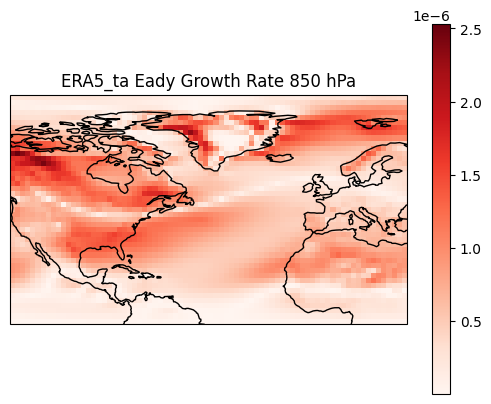

In [7]:
fig,ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()})
dict_egr_era['xr Eady Growth Rate'][1,:,:].plot(cmap='Reds',ax=ax)
ax.coastlines()
ax.set_title('ERA5_ta Eady Growth Rate 850 hPa')

Plot di eady growth rate a 850hPa

Text(0.5, 1.0, 'Eady Growth Rate 850 hPa')

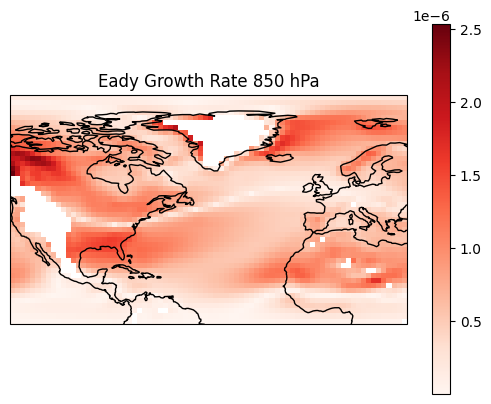

In [8]:
fig,ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()})
models_ta['ACCESS-CM2']['xr Eady Growth Rate'][1,:,:].plot(cmap='Reds',ax=ax)
ax.coastlines()
ax.set_title('Eady Growth Rate 850 hPa')


Text(0.5, 0.92, 'Eady Growth Rate 850 hPa')

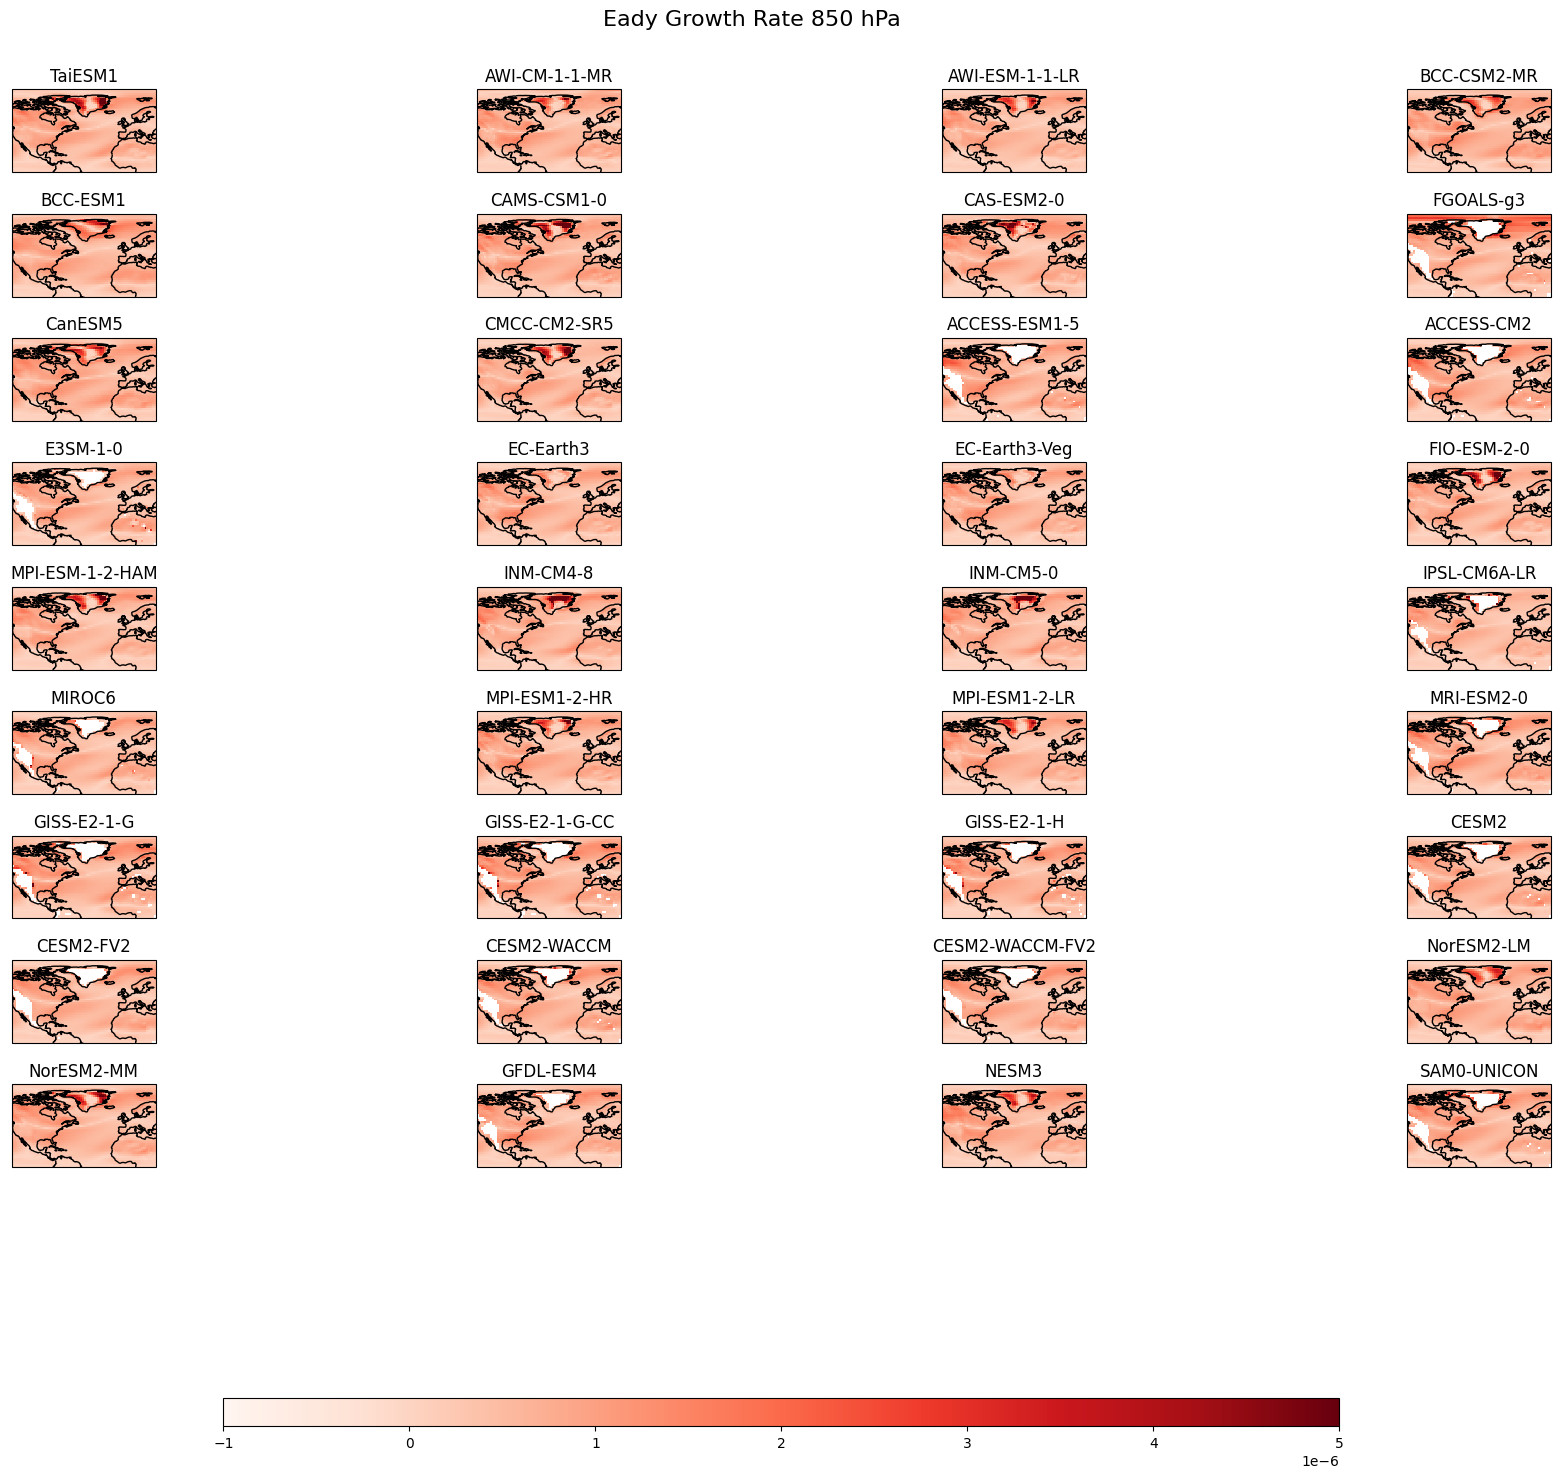

In [9]:
list = []
for name in models_ta.keys():
    list.append(name)
fig,ax = plt.subplots(nrows=int(len(models_ta)/4),ncols=4,figsize=(24,20),subplot_kw={"projection": ccrs.PlateCarree()})
fig.subplots_adjust(hspace=0.5, wspace=0.001)  # Aggiungo spazi verticali tra le subplots
for i in range(int(len(models_ta)/4)):
    for j in range(4):        
        models_index_list = i * 4 + j  # Indice del modello all'interno della lista
        if models_index_list == len(models_ta):
            break
        model_name = list[models_index_list]
        plot_mod = models_ta[model_name]['xr Eady Growth Rate'][1,:,:].plot(ax=ax[i,j],cmap='Reds',vmin=-1e-6,vmax=5e-6,add_colorbar=False)
        ax[i,j].coastlines()
        ax[i,j].set_title(f'{model_name}')
        ax[i,j].set_xlabel('lat')
        ax[i,j].set_ylabel('plev')

fig.colorbar(plot_mod, ax=ax, orientation='horizontal', shrink=0.6, aspect=40)
fig.suptitle('Eady Growth Rate 850 hPa', fontsize=16, y=0.92)

Calcolo della media zonale di egr sia per i modelli, sia per ERA5_ta

In [10]:
#Calcolo la media zonale per ogni modello di egr
for name in models_ta.keys():
    models_ta[name]['zonmean Eady Growth Rate'] = models_ta[name]['xr Eady Growth Rate'].sel(lat=slice(20,90),lon=slice(-60,0)).mean(dim='lon')

In [11]:
#Calcolo la media zonale di egr per ERA5_ta
dict_egr_era['zonmean Eady Growth Rate'] = dict_egr_era['xr Eady Growth Rate'].sel(lat=slice(20,90),lon=slice(-60,0)).mean(dim='lon')

Bias egr solo per stagione DJF

In [12]:
for name in models_ta.keys():
    #bias: modello - osservazioni
    models_ta[name]['egr zonmean bias DJF'] = (models_ta[name]['zonmean Eady Growth Rate'] - dict_egr_era['zonmean Eady Growth Rate'])

In [13]:
models_ta['ACCESS-CM2']['egr zonmean bias DJF']

<xarray.DataArray (plev: 8, lat: 35)> Size: 2kB
array([[ 4.25017851e-08,  1.20239486e-08,  7.06462961e-09,
         2.57244282e-08,  1.91664154e-08,  2.99681668e-08,
         4.26413809e-08,  3.31938849e-08,  6.57422194e-08,
         5.44734904e-08,  1.49306565e-08, -2.45759154e-08,
        -7.91973549e-08, -7.85218471e-08, -1.72911452e-07,
        -2.27029923e-07, -2.85882830e-07, -2.20740900e-07,
        -1.47779862e-07, -8.65360225e-08, -5.43334526e-08,
        -5.02341669e-08,  2.49862180e-08,  1.69407064e-07,
         4.22788912e-07,  4.14591648e-07,  4.52317236e-07,
         6.01043728e-07,  1.08341180e-06,  1.00430876e-06,
         3.25265596e-07, -6.52457236e-07,  1.65492424e-07,
        -6.21137424e-07, -2.91927272e-06],
       [ 1.41907027e-07,  6.66760666e-08,  5.09664633e-08,
         8.39937551e-08,  8.09572859e-08,  6.32059844e-08,
         3.41448174e-08, -1.59145832e-08, -6.16871783e-08,
        -9.30584854e-08, -1.32373060e-07, -1.71856099e-07,
        -1.37674106e-07, -9.68446976e-08, -1.04408659e-07,
        -1.15958130e-07, -1.35992819e-07, -2.74619869e-08,
         2.42291169e-08,  3.59629235e-08, -6.90154719e-09,
         3.67744441e-09,  2.16648275e-09,  1.06060679e-07,
...
         1.79889625e-07,  1.52411231e-07,  9.96630709e-08,
         5.82606529e-08,  5.18737368e-09, -5.45269779e-08,
        -7.74437838e-08, -1.07608038e-07, -1.74483519e-07,
        -2.54085617e-07, -2.92005421e-07, -2.88174053e-07,
        -2.81808791e-07, -2.64353989e-07, -2.34271215e-07,
        -1.72421307e-07, -9.51105641e-08, -6.43360574e-08,
        -6.09408557e-08, -7.41087731e-08, -7.50553055e-08,
        -1.03485203e-07, -1.39752236e-07],
       [ 8.20405507e-08,  9.24314858e-08,  1.32445676e-07,
         1.74330631e-07,  2.03228291e-07,  2.28366143e-07,
         2.14402368e-07,  2.04024440e-07,  2.00114086e-07,
         2.06430874e-07,  2.49174085e-07,  3.00789896e-07,
         3.80904331e-07,  4.63878073e-07,  5.23646077e-07,
         5.76221959e-07,  5.80629687e-07,  5.59028572e-07,
         5.16721327e-07,  4.56382742e-07,  3.19849587e-07,
         1.33766426e-07, -7.93650464e-08, -2.75626652e-07,
        -4.11775963e-07, -3.93648023e-07, -3.14663239e-07,
        -7.35585039e-08, -4.20000575e-08, -4.73885370e-08,
         6.74198985e-08,  1.16406422e-07,  1.14583886e-07,
         7.28455272e-08, -1.88367538e-09]])
Coordinates:
  * lat      (lat) float64 280B 21.0 23.0 25.0 27.0 29.0 ... 83.0 85.0 87.0 89.0
  * plev     (plev) float64 64B 9.25e+04 8.5e+04 7e+04 ... 4e+04 3e+04 2.5e+04

Plot di Eady growth rate (egr_zmean)

In [14]:
list_clusters = [list_cluster0,list_cluster1,list_cluster2,list_cluster3,list_cluster4]

Cluster 0

In [32]:
def plot_ta_zonmean(n_rows, n_cols, fig_size, name_models_to_plot, name_dict, dataset_seas_mean, v_min, v_max, title_plot, title_pdf):
    # Plot medie annuali dei modelli
    fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=fig_size)
    fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Aggiungo spazi verticali tra le subplots
    # Plot dei modelli
    for i in range(n_rows):  # Ciclo sulle righe
        for j in range(n_cols):  # Ciclo sulle colonne
            models_index_list = i * n_cols + j  # Indice del modello all'interno della lista
            if models_index_list == len(name_models_to_plot):
                break
            model_name = name_models_to_plot[models_index_list]
            data_array = name_dict[model_name]['egr zonmean bias DJF']
            plot_mod = ax[i, j].pcolormesh(data_array.lat, data_array.plev, data_array, cmap='seismic', vmin=v_min, vmax=v_max)
            # Plot della climatologia dei singoli modelli e di ERA5
            #data = name_dict[model_name]['zonmean Eady Growth Rate']
            #data_era = dataset_seas_mean['zonmean Eady Growth Rate']
            # Plot
            #contour_data = data.plot.contour(ax=ax[i, j], colors='k')  # In modo che l'array sia 2D su plev e lat
            #ax[i,j].clabel(contour_data, fmt='%1.1f')
            #contour_era = data_era.plot.contour(ax=ax[i, j], colors='g')
            #ax[i,j].clabel(contour_era, fmt='%1.1f')
            ax[i, j].set_ylabel('plev')
            ax[i, j].set_xlabel('lat')
            ax[i, j].set_title(model_name)  # Nome di ogni singolo modello sul plot
            # Inverto l'asse y in modo che i livelli di pressione siano corretti
            ax[i, j].invert_yaxis()

    # Rimuovo i quadrati non utilizzati
    for i in range(n_rows):
        for j in range(n_cols):
            models_index_list = i * n_cols + j            
            if models_index_list >= len(name_models_to_plot):
                ax[i, j].axis('off')

    # Legenda per linee tratteggiate
    fig.legend(['Linee nere - climatologia modello', 'Linee verdi - climatologia ERA5_ta'], loc='upper right', bbox_to_anchor=(1.2, 1))
    # Titolo
    fig.suptitle(title_plot, fontsize=16, y=0.95)
    fig.colorbar(plot_mod, ax=ax, orientation='horizontal', shrink=0.6, aspect=30, pad=0.05)
    fig.savefig(title_pdf, format='pdf')

In [42]:
def plot_ta_zonmean_2_cluster(fig_size, name_models_to_plot, name_dict, dataset_seas_mean, v_min, v_max, title_plot, title_pdf):
    # Plot medie annuali dei modelli
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=fig_size)
    fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Aggiungo spazi verticali tra le subplots
    # Plot dei modelli
    for j in range(2):  # Ciclo sulle colonne
        model_name = name_models_to_plot[j]
        data_array = name_dict[model_name]['egr zonmean bias DJF']
        plot_mod = ax[j].pcolormesh(data_array.lat, data_array.plev, data_array, cmap='seismic', vmin=v_min, vmax=v_max)
        # Plot della climatologia dei singoli modelli e di ERA5
        #data = name_dict[model_name]['zonmean Eady Growth Rate']
        #data_era = dataset_seas_mean['zonmean Eady Growth Rate']
        # Plot
        #contour_data = data.plot.contour(ax=ax[i, j], colors='k')  # In modo che l'array sia 2D su plev e lat
        #ax[i,j].clabel(contour_data, fmt='%1.1f')
        #contour_era = data_era.plot.contour(ax=ax[i, j], colors='g')
        #ax[i,j].clabel(contour_era, fmt='%1.1f')
        ax[j].set_ylabel('plev')
        ax[j].set_xlabel('lat')
        ax[j].set_title(model_name)  # Nome di ogni singolo modello sul plot
        # Inverto l'asse y in modo che i livelli di pressione siano corretti
        ax[j].invert_yaxis()

    # Legenda per linee tratteggiate
    fig.legend(['Linee nere - climatologia modello', 'Linee verdi - climatologia ERA5_ta'], loc='upper right', bbox_to_anchor=(1.2, 1))
    # Titolo
    fig.suptitle(title_plot, fontsize=16, y=0.95)
    fig.colorbar(plot_mod, ax=ax, orientation='horizontal', shrink=0.6, aspect=40)
    fig.savefig(title_pdf, format='pdf')

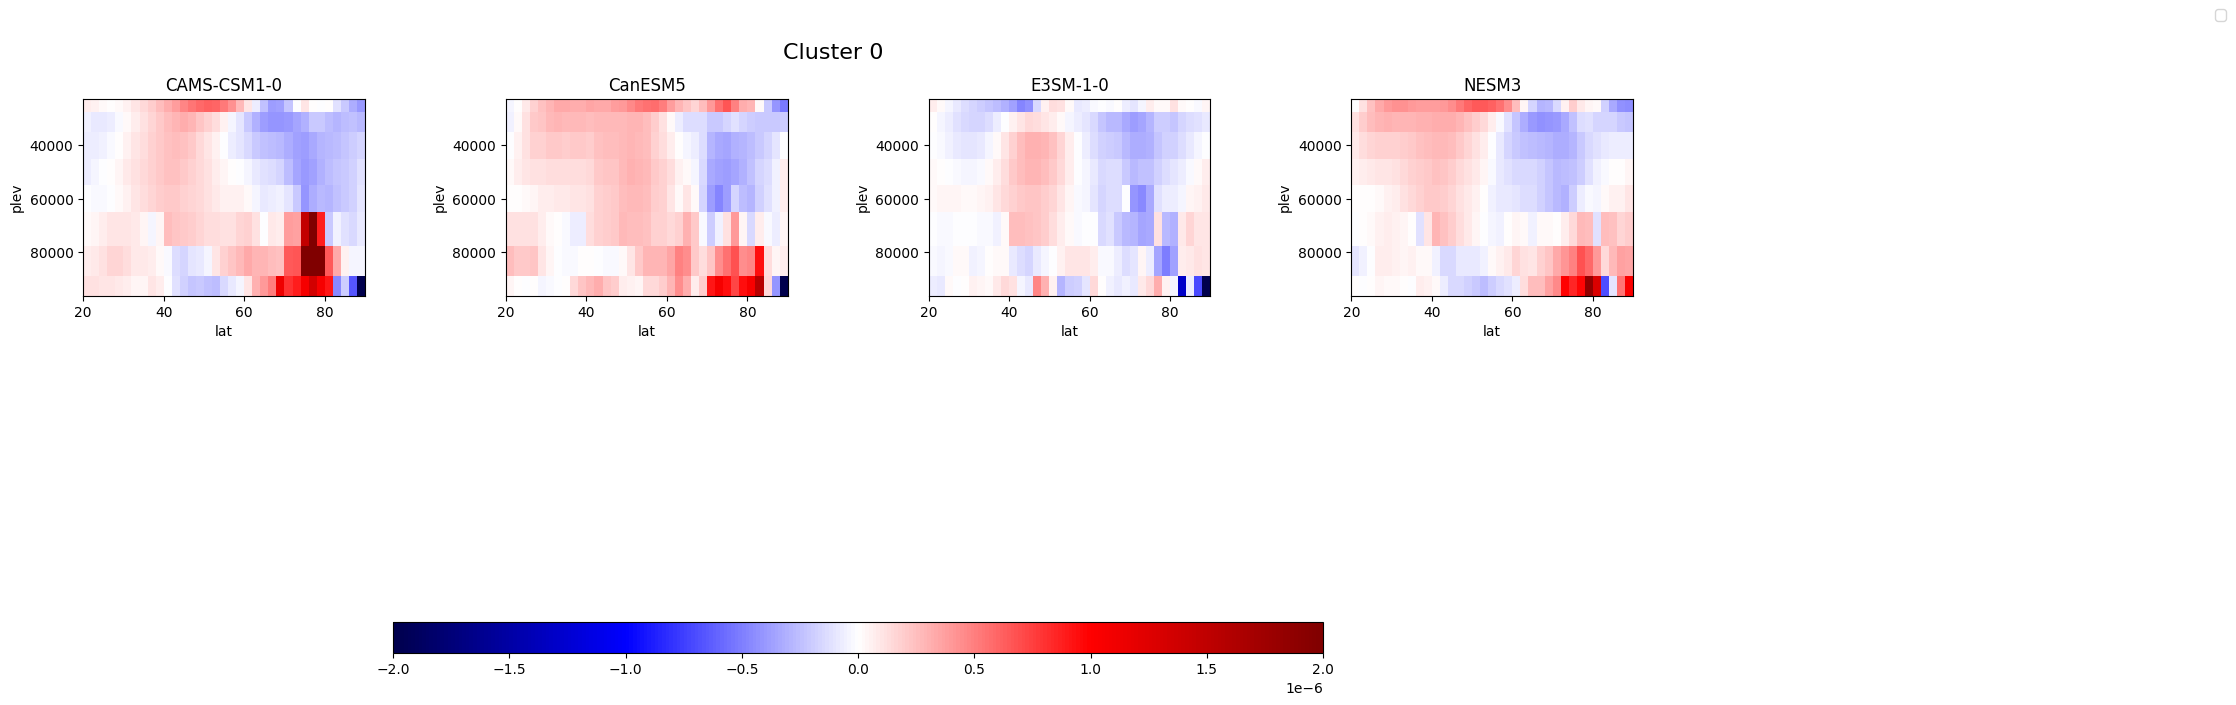

In [34]:
plot_ta_zonmean(int(len(list_cluster0)/4)+1,4, (20,8),list_cluster0,models_ta,dict_egr_era, -2e-6,2e-6,'Cluster 0','ta_zonmean_cluster0.pdf')

Cluster 1

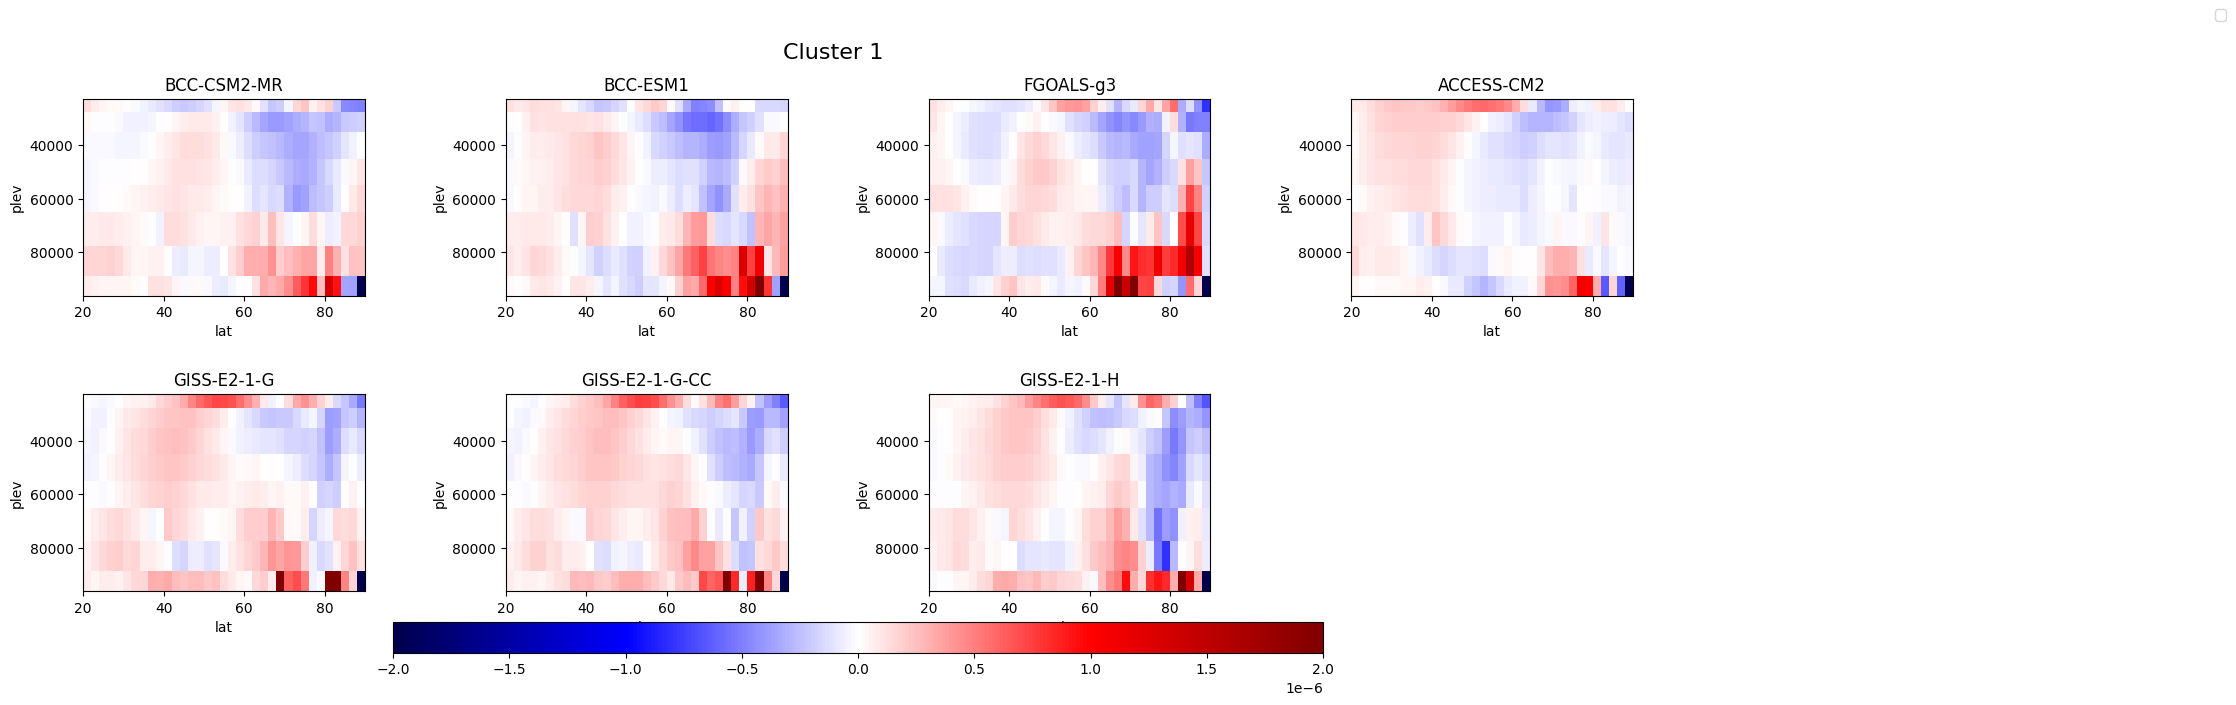

In [35]:
plot_ta_zonmean(int(len(list_cluster1)/4)+1,4, (20,8),list_cluster1,models_ta,dict_egr_era,-2e-6,2e-6,'Cluster 1','ta_zonmean_cluster1.pdf')

Cluster 2

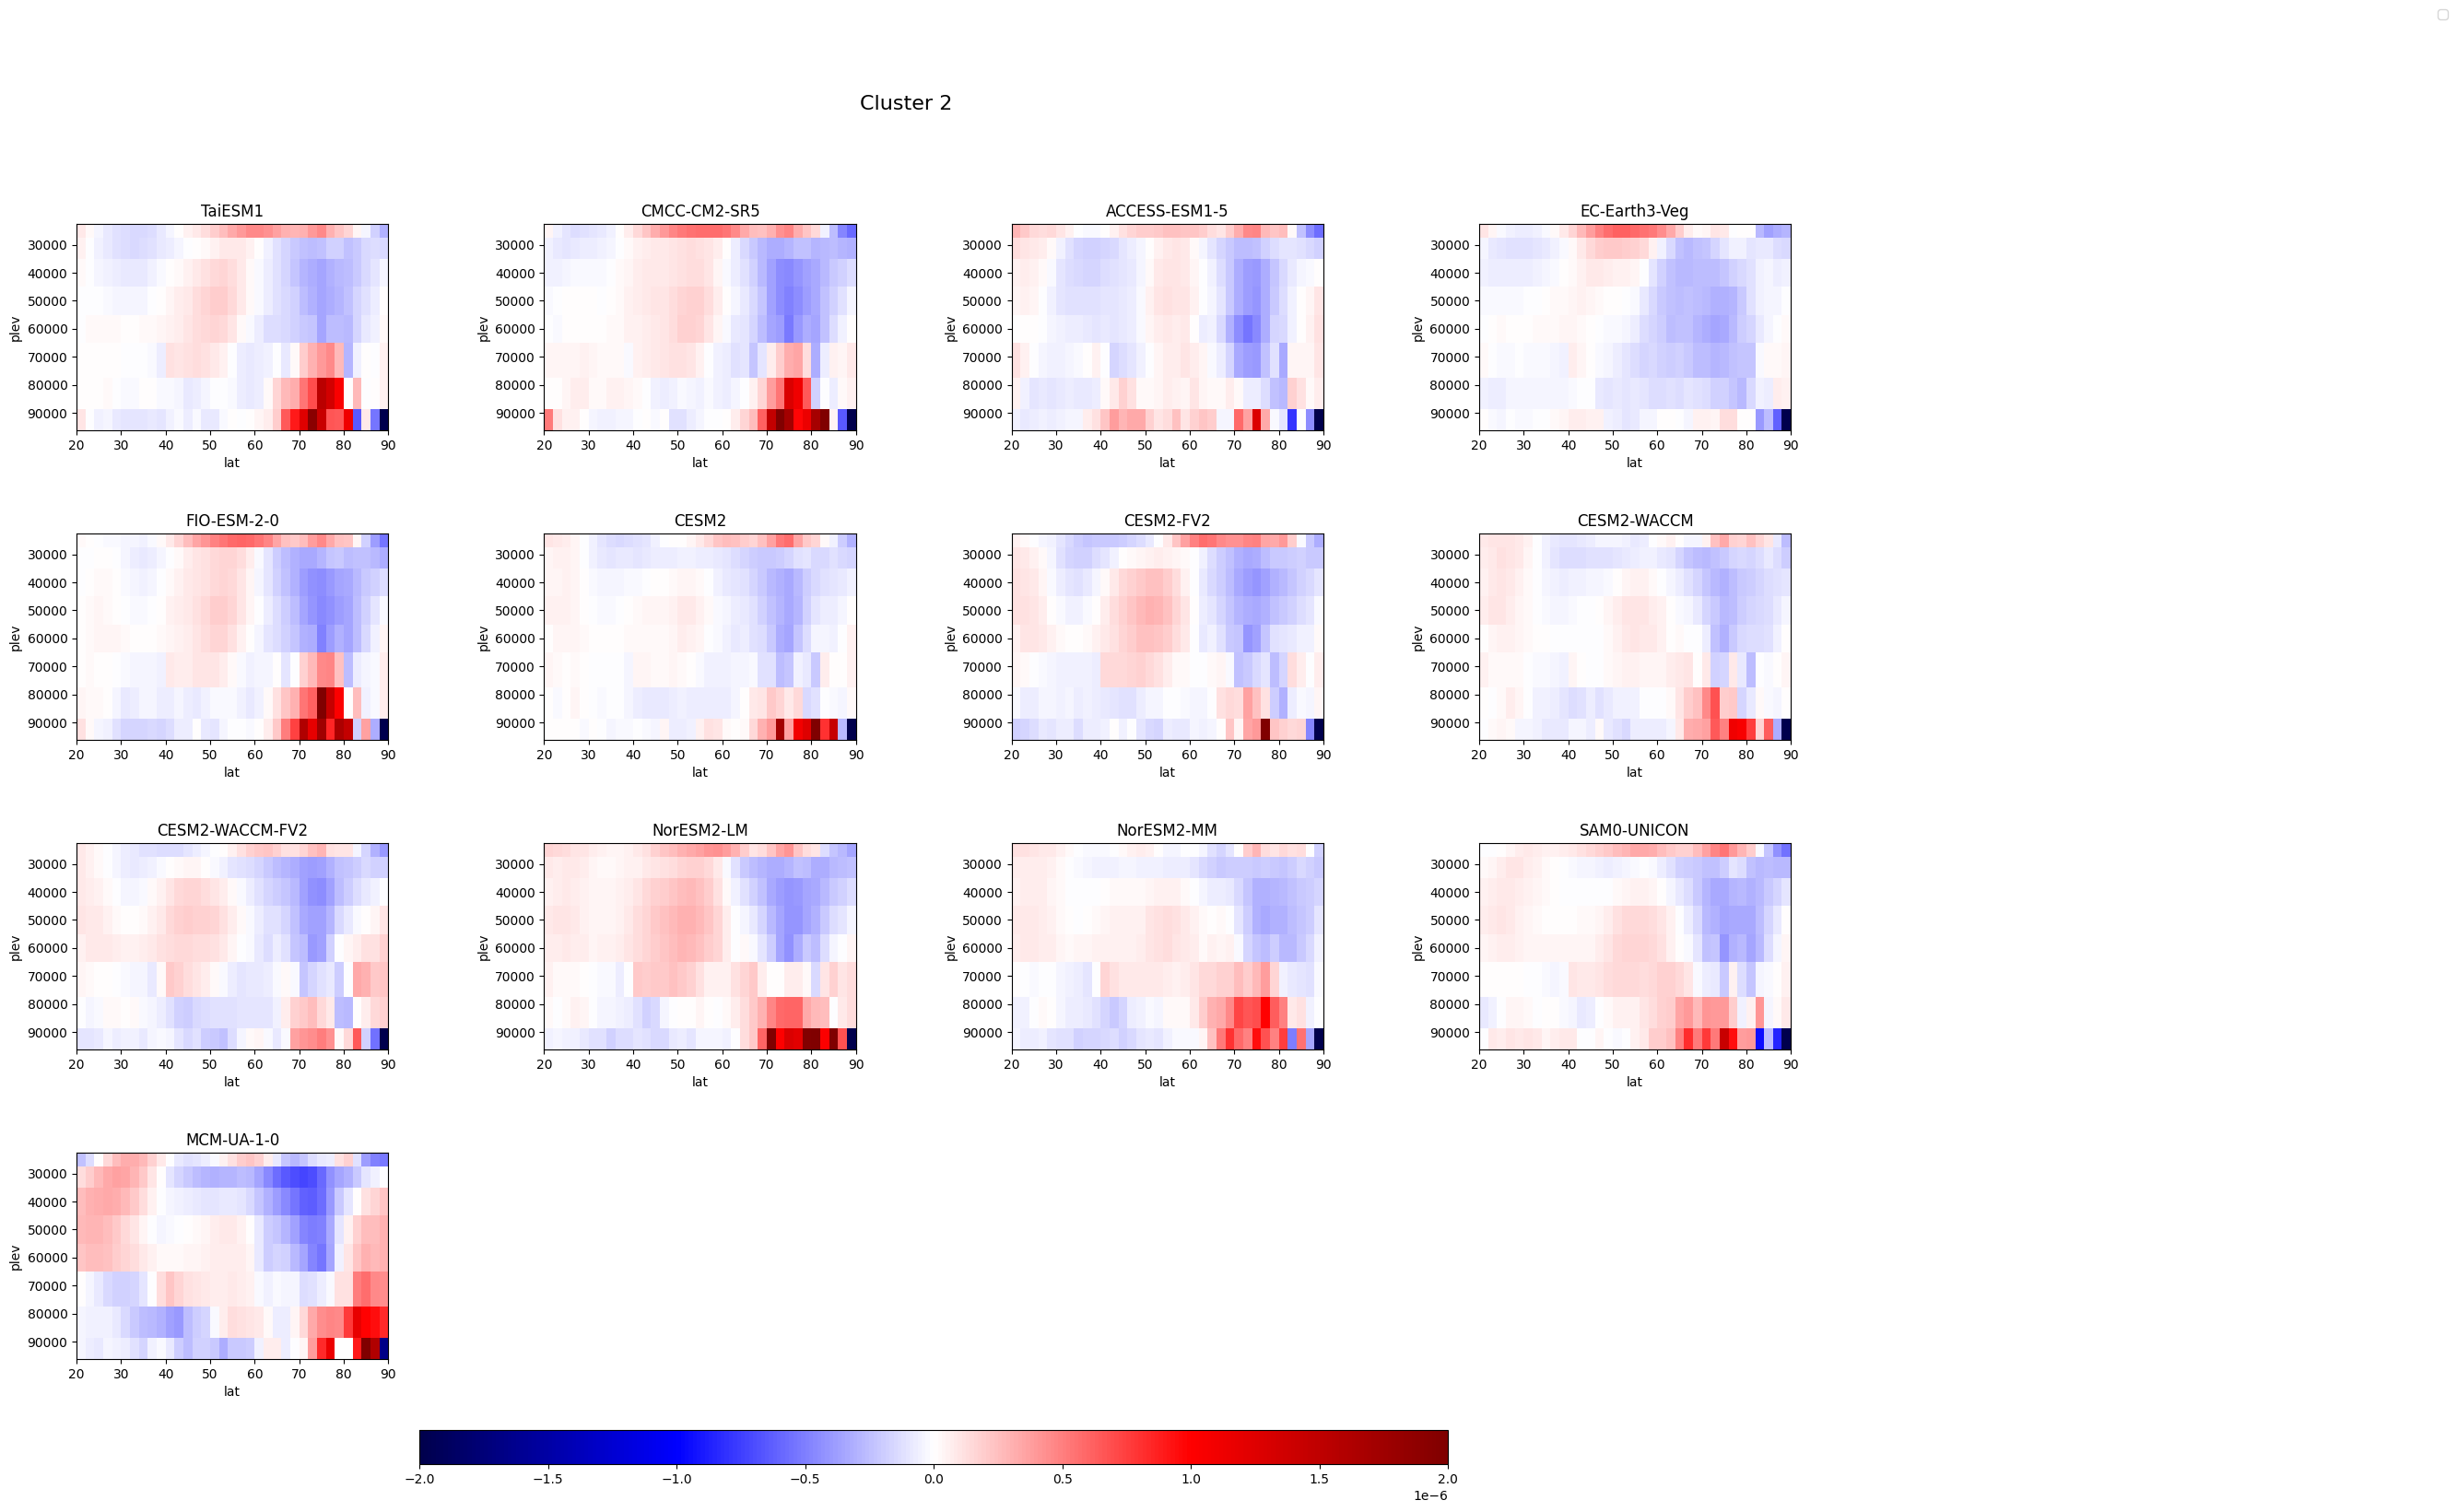

In [36]:
plot_ta_zonmean(int(len(list_cluster2)/4)+1,4, (24,20),list_cluster2,models_ta,dict_egr_era,-2e-6,2e-6,'Cluster 2','ta_zonmean_cluster2.pdf')

Cluster 3

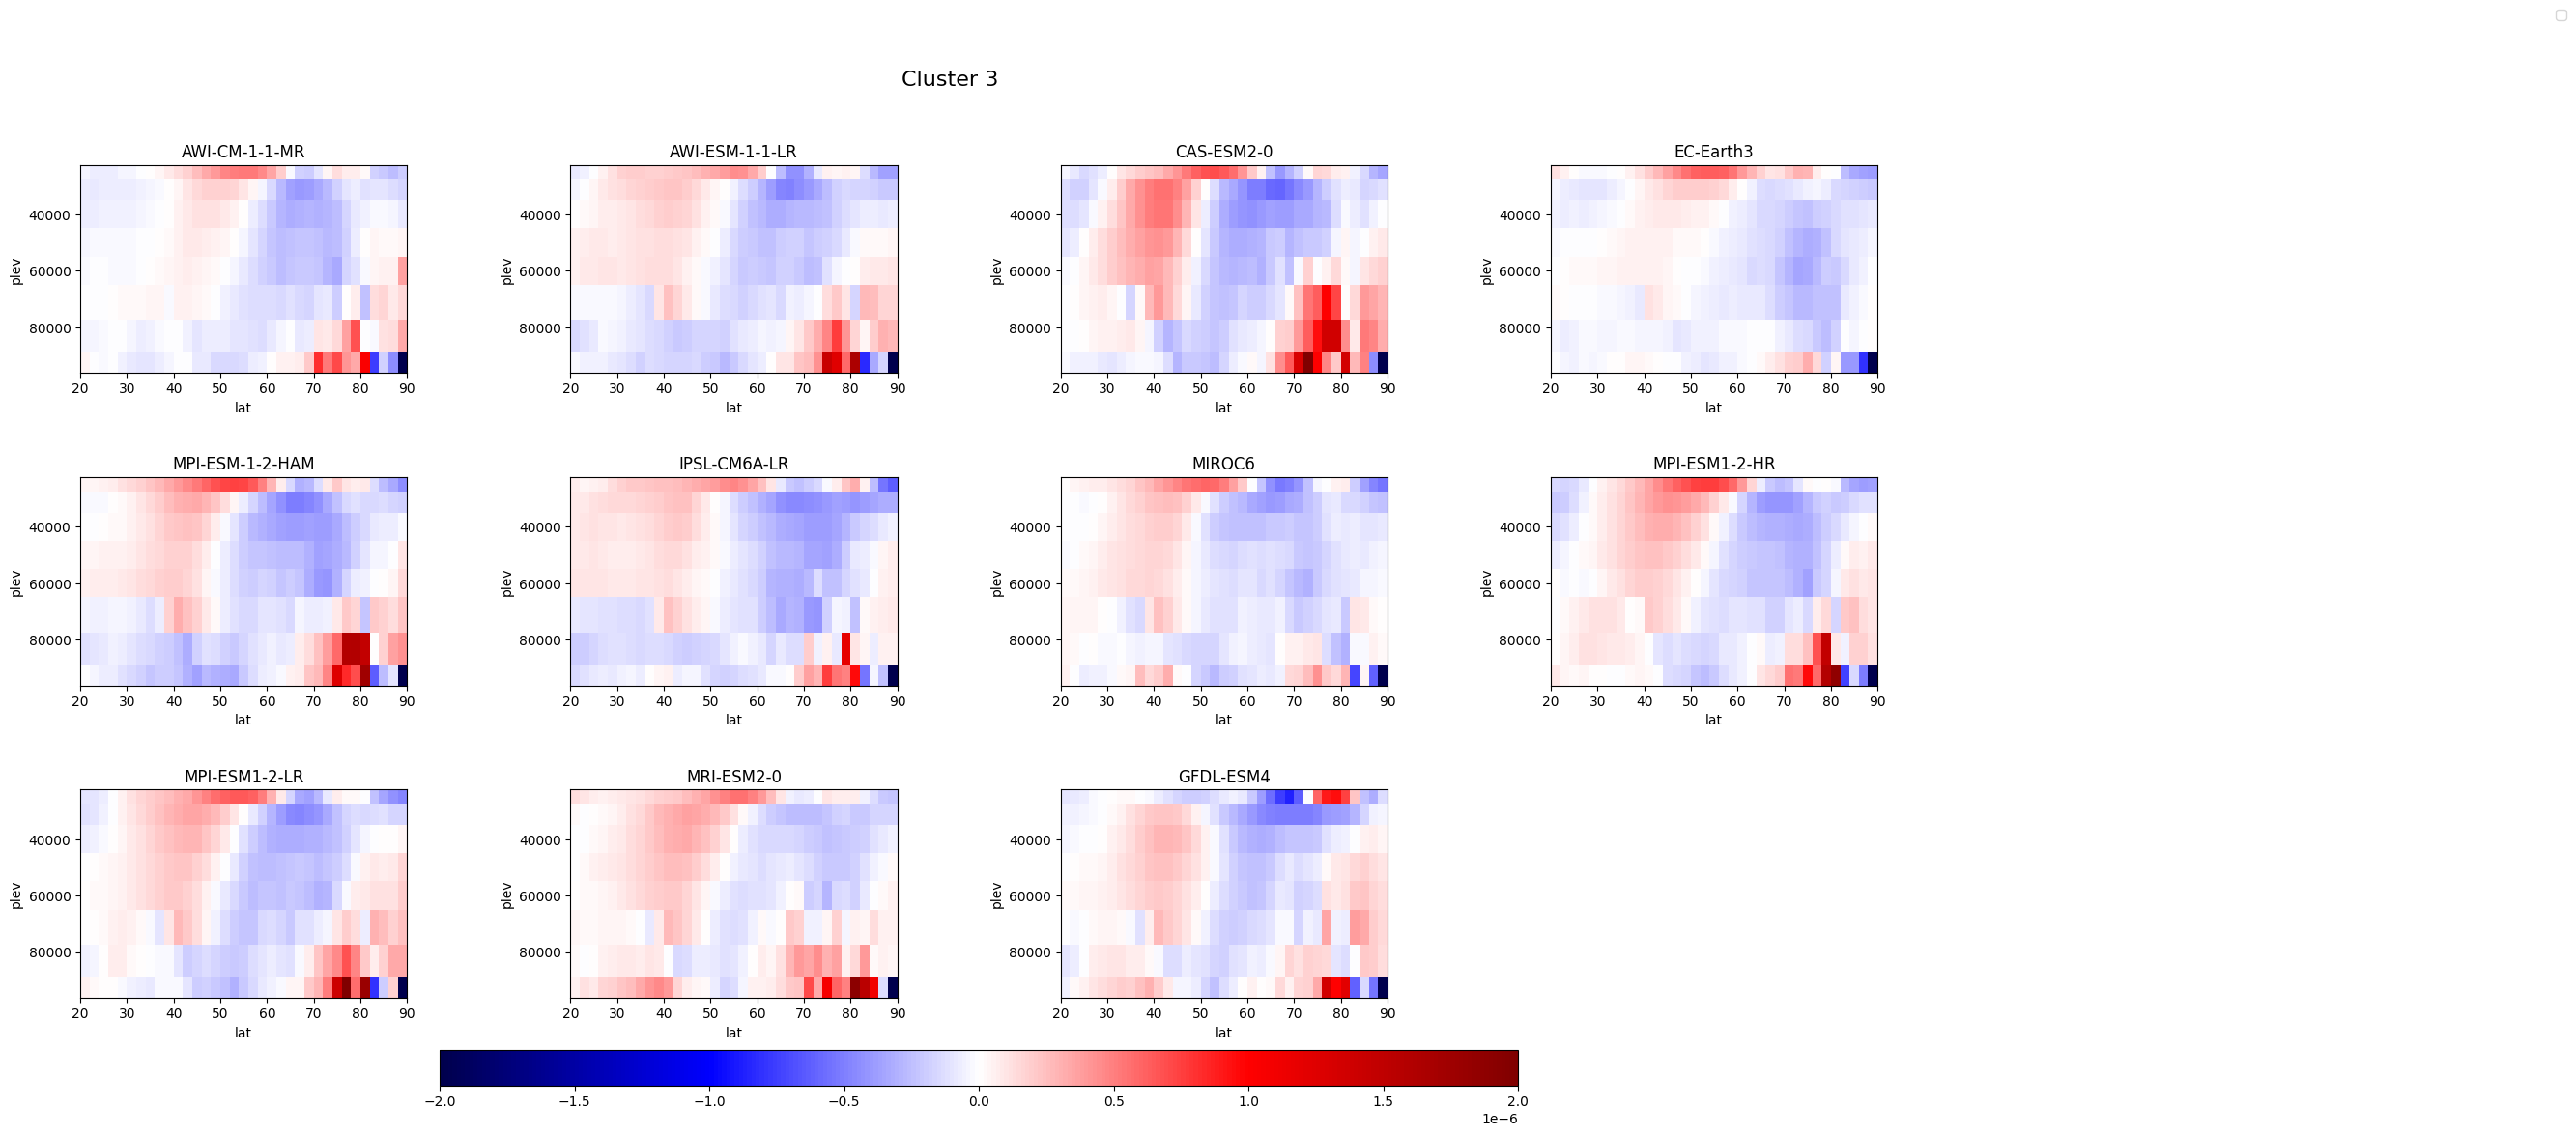

In [52]:
plot_ta_zonmean(int(len(list_cluster3)/4)+1,4, (24,14),list_cluster3,models_ta,dict_egr_era,-2e-6,2e-6,'Cluster 3','ta_zonmean_cluster3.pdf')

Cluster 4

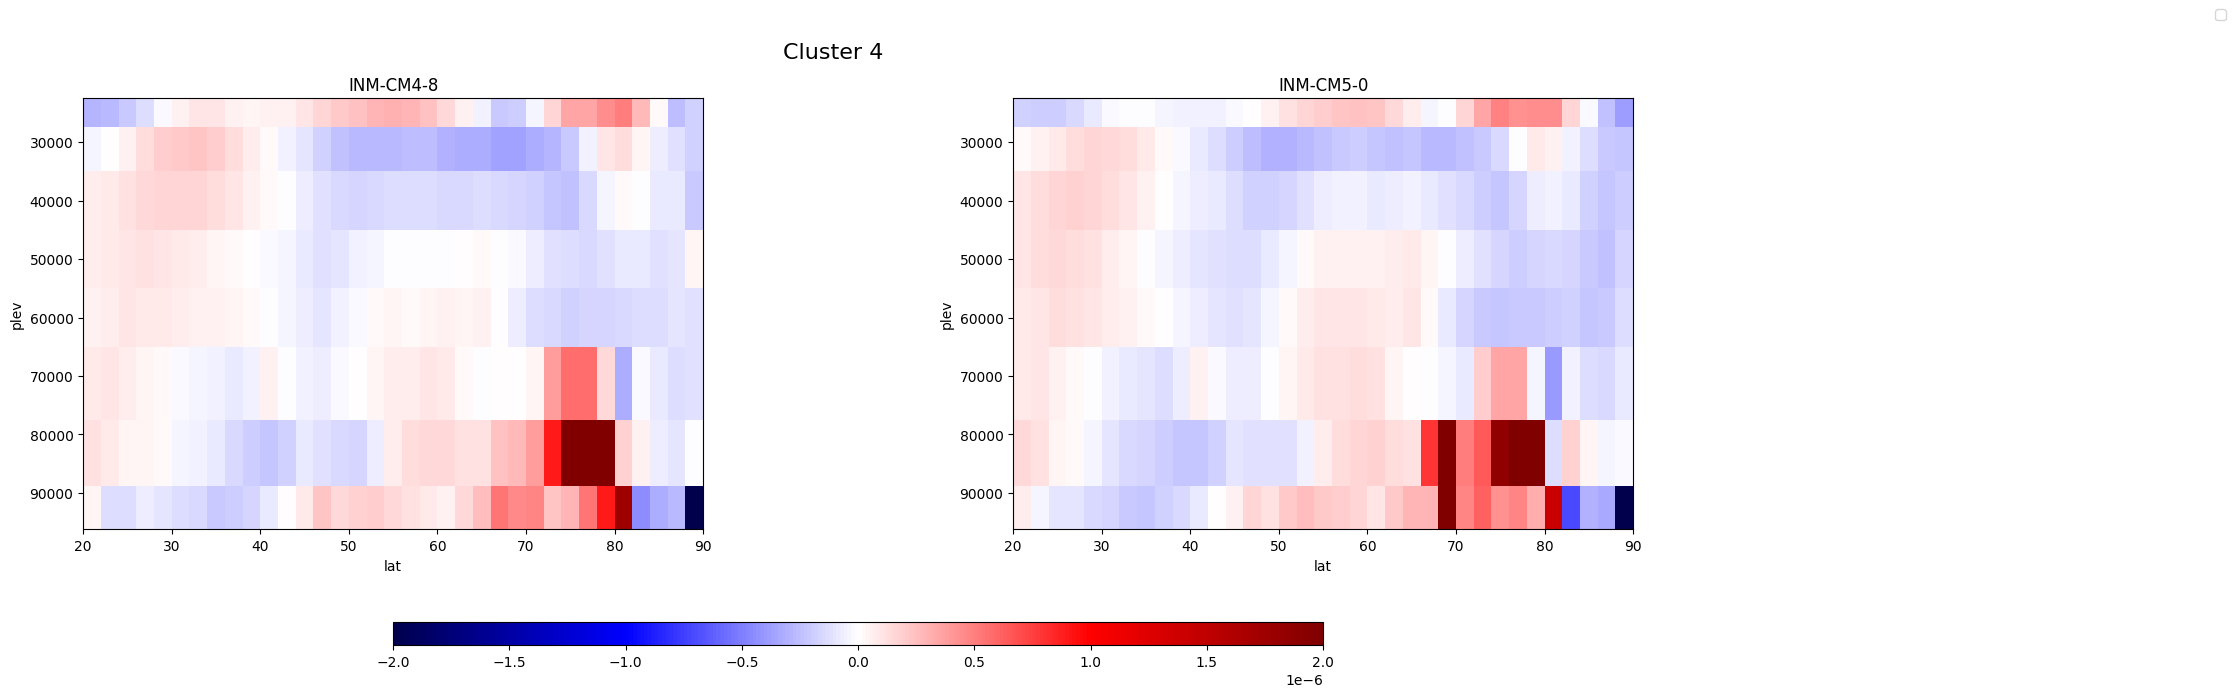

In [43]:
plot_ta_zonmean_2_cluster((20,8),list_cluster4,models_ta,dict_egr_era,-2e-6,2e-6,'Cluster 4','ta_zonmean_cluster4.pdf')

Cluster medi 5

In [44]:
def plot_5_mean_cluster_ta_zonmean(list_5_clusters, dataset_seas_mean, fig_size, name_dict, v_min, v_max, title_plot, title_pdf): #plot dei 5 cluster medi di zonmean    
    fig,ax = plt.subplots(nrows=2,ncols=3,figsize=fig_size)
    fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Aggiungo spazi verticali tra le subplots
    #calcolo il valor medio
    for j in range(len(list_5_clusters)): # ciclo su tutti i 5 cluster medi
        #Inizializzo sum_zonmean per il calcolo della media di zonmean
        sum_zonmean = 0
        for i in range(len(list_5_clusters[j])):  # ciclo sui modelli del cluster j-esimo
            model_name = list_5_clusters[j][i]
            zonmean = name_dict[model_name]['egr zonmean bias DJF']
            zonmean = zonmean.assign_coords({"plev" : zonmean.plev.round()}) #arrotondo in modo tale che i livelli di pressione siano gli stessi per ogni modello
            sum_zonmean = sum_zonmean + zonmean
        #valor medio
        mean_zonmean = sum_zonmean / len(list_5_clusters[j])
        # Plot
        if j <= 2:  # primi 3 cluster medi
            k = 0  # indice per le righe --> prima riga
            l = j  # indice per le colonne
        else:
            k = 1  # indice per le righe --> seconda riga
            l = k*j - 3  # indice per le colonne --> l appartiene [0, 1]         
        plot_mod = mean_zonmean.plot(vmin=v_min, vmax=v_max, cmap='seismic', ax=ax[k,l], add_colorbar=False)
        #data_era = dataset_seas_mean['zonmean Eady Growth Rate']
        #contour_era = data_era.plot.contour(ax=ax[k,l],colors='g')
        #ax[k,l].clabel(contour_era, fmt='%1.1f')
        ax[k,l].set_xlabel('latitude')
        ax[k,l].set_ylabel('plev')
        ax[k,l].invert_yaxis()
        # Titolo
        ax[k,l].set_title(f'Cluster {j}', fontsize=16, y=1.02)

    # Rimuovo il plot vuoto ax[1, 2]
    ax[1, 2].axis('off')    
    # Legenda per linee verdi
    fig.legend(['Linee verdi - climatologia ERA5'], loc='upper right', bbox_to_anchor=(1.2, 1))
    # Barra del colore
    fig.colorbar(plot_mod, ax=ax, orientation='horizontal', shrink=0.6, aspect=40)          
    # Titolo
    fig.suptitle(title_plot, fontsize=16, y=1.02)
    fig.savefig(title_pdf, format='pdf')

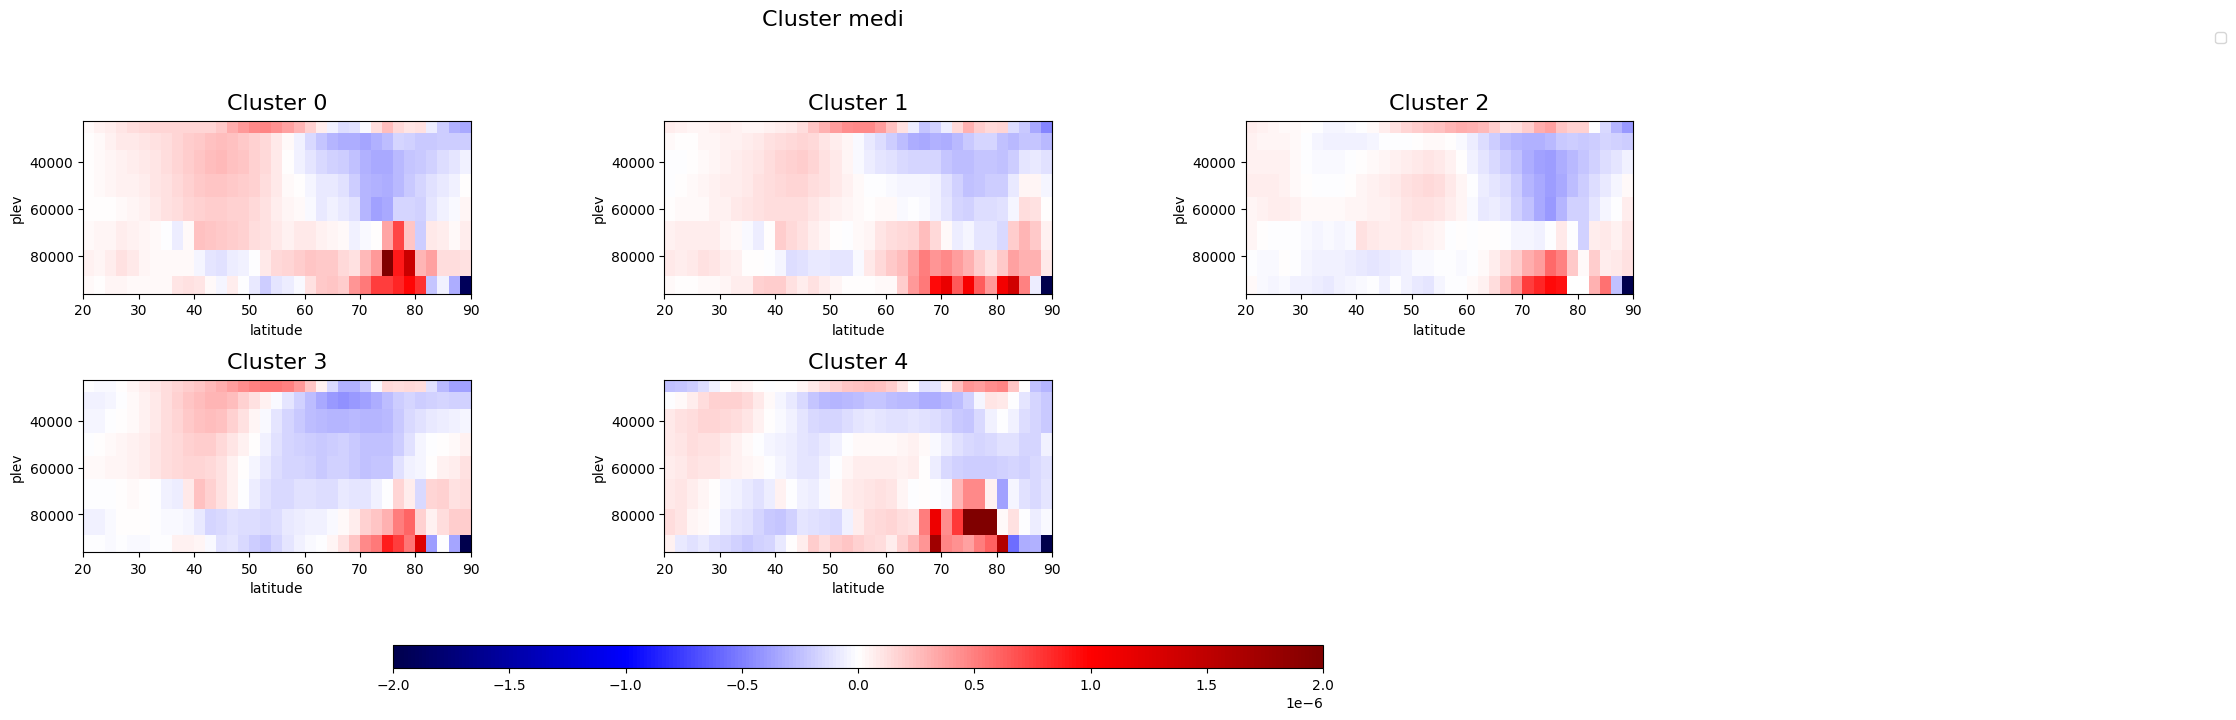

In [51]:
plot_5_mean_cluster_ta_zonmean(list_clusters, dict_egr_era, (20,8), models_ta, -2e-6, 2e-6, 'Cluster medi', 'ta_zonmean_cluster_mean.pdf')